In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Memory usage

In [42]:
dt_by_analy = pd.read_csv('bytes_analytic_N4_means6.txt', header=None)
dt_by_auto = pd.read_csv('bytes_autodiff_N4_means6.txt', header=None)


In [43]:
lat_dim=list(range(2,6+1))

data_by_analy = dt_by_analy.transpose()
data_by_analy.columns = ["p100_an","p200_an"]

data_by_auto = dt_by_auto.transpose()
data_by_auto.columns = ["p100_au","p200_au"]

data = pd.concat([data_by_analy,data_by_auto], axis=1)
data["d"]=lat_dim
data=data.set_index("d")
data

,p100_an,p200_an,p100_au,p200_au
d,,,,
2,693328,1061624,5984688,18805416
3,716712,1094232,10476280,19367240
4,1202088,1322056,72042960,68618256
5,8614608,8734640,585833520,1032158464
6,93623240,93743256,4790412920,8359926264


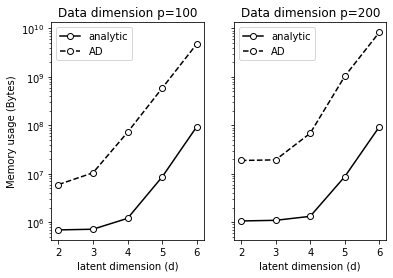

In [78]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# p=100
ax1.plot(data.index, data["p100_an"], marker='.', markersize=12, color="black", markerfacecolor='white', label='analytic')
ax1.plot(data.index, data["p100_au"], marker='.', linestyle='dashed', markersize=12, color="black", markerfacecolor='white', label='AD')
ax1.set_title('Data dimension p=100')
ax1.set_yscale('log')
ax1.set_xticks(data.index)
ax1.set_xlabel('latent dimension (d)')
ax1.set_ylabel('Memory usage (Bytes)')
ax1.legend()

# p=200
ax2.plot(data.index, data["p200_an"], marker='.', markersize=12, color="black", markerfacecolor='white', label='analytic')
ax2.plot(data.index, data["p200_au"], marker='.', linestyle='dashed', markersize=12, color="black", markerfacecolor='white', label='AD')
ax2.set_title('Data dimension p=200')
ax2.set_yscale('log')
ax2.set_xticks(data.index)
ax2.set_xlabel('latent dimension (d)')
#ax2.set_ylabel('Memory usage (Bytes)')
ax2.legend()

f.show()
f.savefig('memory_usage_compare.pdf')  



#Runtime

In [79]:
dt_ms_analy = pd.read_csv('ms_analytic_N4_means6.txt', header=None)
dt_ms_auto = pd.read_csv('ms_autodiff_N4_means6.txt', header=None)


In [80]:
lat_dim=list(range(2,6+1))

data_ms_analy = dt_ms_analy.transpose()
data_ms_analy.columns = ["p100_an","p200_an"]

data_ms_auto = dt_ms_auto.transpose()
data_ms_auto.columns = ["p100_au","p200_au"]

data_ms = pd.concat([data_ms_analy,data_ms_auto], axis=1)
data_ms["d"]=lat_dim
data_ms=data_ms.set_index("d")
data_ms

,p100_an,p200_an,p100_au,p200_au
d,,,,
2,4.29694,7.19833,49.8865,114.122
3,30.12850,40.16330,160.0820,279.554
4,290.03000,394.98600,1248.2200,1861.540
5,3195.69000,4506.23000,13847.3000,20651.400
6,34772.80000,50932.00000,154268.0000,236687.000


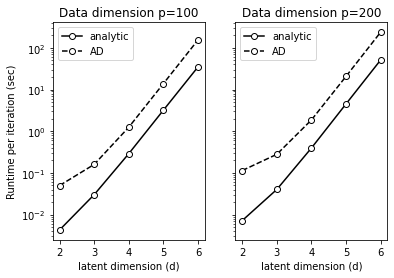

In [86]:
f2, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# p=100
ax1.plot(data_ms.index, data_ms["p100_an"]/1000, marker='.', markersize=12, color="black", markerfacecolor='white', label='analytic')
ax1.plot(data_ms.index, data_ms["p100_au"]/1000, marker='.', linestyle='dashed', markersize=12, color="black", markerfacecolor='white', label='AD')
ax1.set_title('Data dimension p=100')
ax1.set_yscale('log')
ax1.set_xticks(data.index)
ax1.set_xlabel('latent dimension (d)')
ax1.set_ylabel('Runtime per iteration (sec)')
ax1.legend()

# p=200
ax2.plot(data_ms.index, data_ms["p200_an"]/1000, marker='.', markersize=12, color="black", markerfacecolor='white', label='analytic')
ax2.plot(data_ms.index, data_ms["p200_au"]/1000, marker='.', linestyle='dashed', markersize=12, color="black", markerfacecolor='white', label='AD')
ax2.set_title('Data dimension p=200')
#ax2.set_yscale('log')
ax2.set_xticks(data.index)
ax2.set_xlabel('latent dimension (d)')
ax2.legend()

f2.show()
f2.savefig('runtime_compare.pdf')  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Saw kwargs ['mfc', 'markerfacecolor'] which are all aliases for 'markerfacecolor'.  Kept value from 'markerfacecolor'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  


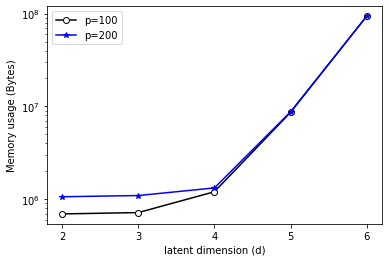

In [54]:
fig = plt.figure()
plt.plot(data.index, data["p100_an"], marker='.', mfc='none', markersize=12, color="black", markerfacecolor='white', label='p=100')
plt.plot(data.index, data["p200_an"], '-b*', color="b",label='p=200')
plt.yscale('log')
plt.xticks(data.index)
plt.xlabel('latent dimension (d)')
plt.ylabel('Memory usage (Bytes)')
plt.legend()
plt.show()


In [30]:
data

,p100,p200
d,,
2,693328,1061624
3,716712,1094232
4,1202088,1322056
5,8614608,8734640
6,93623240,93743256
